# Outro DB para você exercitar
[Usaremos dados de exemplo do site doFactory](https://www.dofactory.com/sql/sample-database).

#### Para recriar o banco de dados em SQLite, sem Python, basta executar o arquivo com os comandos SQL na linha de comando do sistema operacional:

```shell
sqlite3 doFactory.db < sample-doFactory-dump.sql
```

#### Use Python para criar o DB e fazer algumas queries.

## Crie o DB

#### Vamos primeiro usar a estrutura e dados do arquivo `sql-doFactory-database.sql` para criar um banco de dados no arquivo `database.db`.

In [68]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

Tamanho padrão das figuras neste notebook

In [79]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

Criando conexão com o banco de dados

In [ ]:
db = sqlite3.connect('doFactory.db')

In [67]:
script = 'sample-doFactory-dump.sql'

db.cursor().executescript(open(script).read())

## SQLite com Pandas

#### Agora começamos a fazer queries:

#Por fornecedores

#### Liste todos os fornecedores (suppliers)

In [4]:
query = "SELECT CompanyName FROM 'Supplier' ORDER BY CompanyName;"

queryResult = pd.read_sql_query(query,db)

queryResult

,CompanyName
0,Aux joyeux ecclésiastiques
1,Bigfoot Breweries
2,Cooperativa de Quesos 'Las Cabras'
3,Escargots Nouveaux
4,Exotic Liquids
5,Formaggi Fortini s.r.l.
6,Forêts d'érables
7,"G'day, Mate"
8,Gai pâturage
9,Grandma Kelly's Homestead


#### Faça um ranking de fornecedores ordenados por quem mais vende:

In [125]:
conn = sqlite3.connect('doFactory.db')
curs = conn.cursor()

Conferindo quais tabelas temos na base de dados

In [9]:
res = curs.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
for name in res:
    print (name[0])

Customer
Order
OrderItem
Product
Supplier


####Quais empresas mais arrecadam com as vendas?

In [119]:
query = """SELECT s.CompanyName,
          SUM(o.UnitPrice * o.Quantity) AS 'TotalSale'
    
    FROM 
    Supplier AS s, product AS p, orderItem AS o
    
    WHERE
    s.Id = p.SupplierId AND
    p.Id = o.ProductId
    
    GROUP BY 
    s.Id
    
    ORDER BY
    TotalSale DESC;"""

queryResult = pd.read_sql_query(query, conn)

queryResult.head()

,CompanyName,TotalSale
0,Aux joyeux ecclésiastiques,163135.00
1,Plutzer Lebensmittelgroßmärkte AG,155946.55
2,Gai pâturage,126582.00
3,"Pavlova, Ltd.",115386.05
4,"G'day, Mate",69636.60


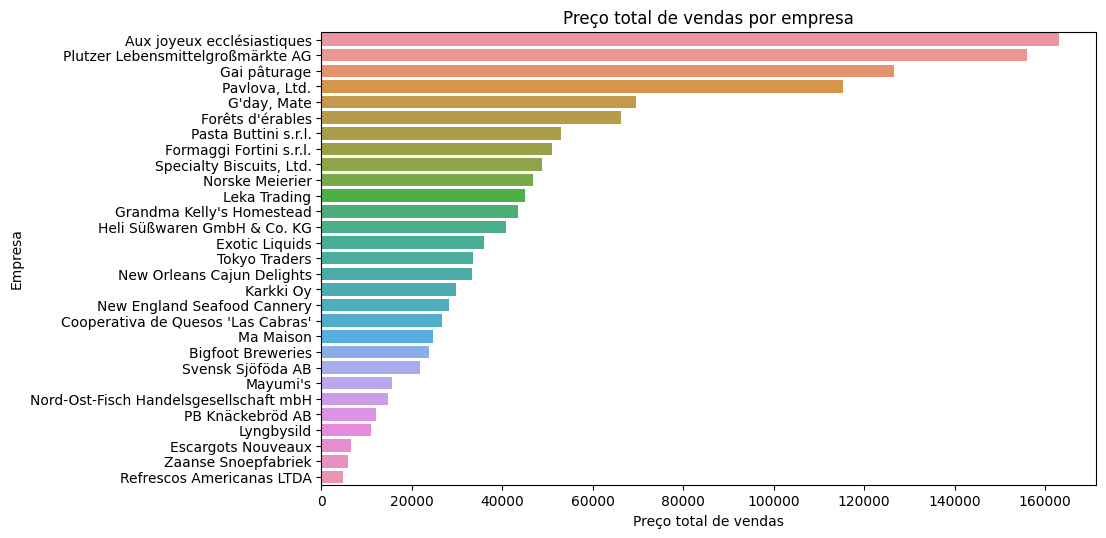

In [100]:
# Gráfico de barras
empresas_que_mais_arrecadam = sns.barplot(x= queryResult['TotalSale'], y= queryResult['CompanyName'])

#Título
empresas_que_mais_arrecadam.set_title('Preço total de vendas por empresa')

#Legenda eixo x
empresas_que_mais_arrecadam.set_xlabel('Preço total de vendas')

#Legenda eixo y
empresas_que_mais_arrecadam.set_ylabel('Empresa');

####Quem mais vende produtos no total, mesmo que arrecade menos por causa do valor dos produtos?

In [120]:
query = """SELECT s.CompanyName,
          SUM(o.Quantity) AS 'quantitySalesProduct'
    
    FROM 
    Supplier AS s, product AS p, orderItem AS o
    
    WHERE
    s.Id = p.SupplierId AND
    p.Id = o.ProductId
    
    GROUP BY 
    s.Id
    
    ORDER BY
    quantitySalesProduct DESC;"""

query_produtos_vendidos = pd.read_sql_query(query, conn)

query_produtos_vendidos.head()

,CompanyName,quantitySalesProduct
0,Plutzer Lebensmittelgroßmärkte AG,4072
1,"Pavlova, Ltd.",3937
2,Gai pâturage,3073
3,"Specialty Biscuits, Ltd.",2851
4,Norske Meierier,2526


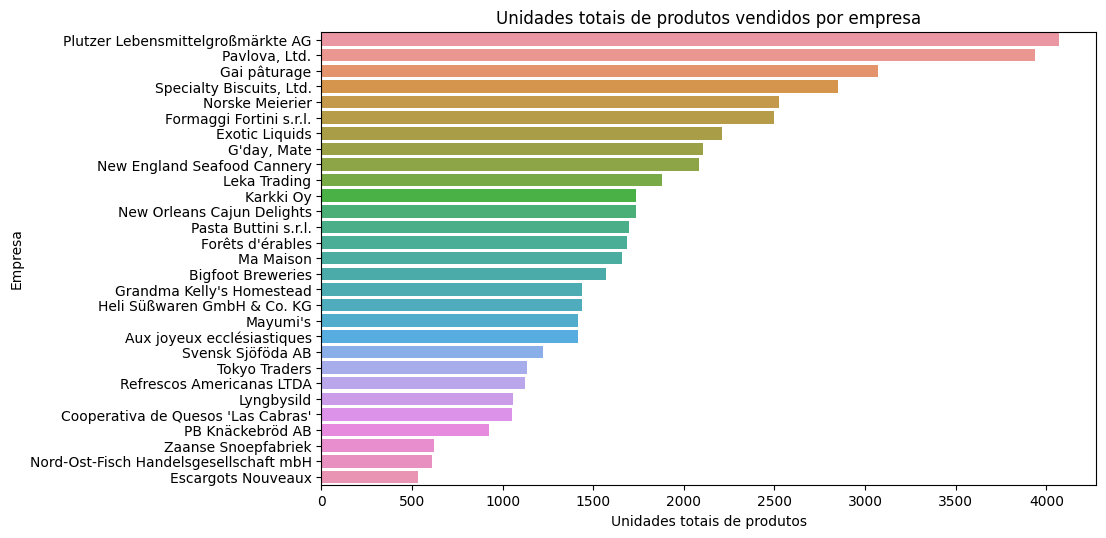

In [106]:
# Gráfico de barras
unidade_produtos_por_empresa = sns.barplot(x= query_produtos_vendidos['quantitySalesProduct'], y= query_produtos_vendidos['CompanyName'])

#Título
unidade_produtos_por_empresa.set_title('Unidades totais de produtos vendidos por empresa')

#Legenda eixo x
unidade_produtos_por_empresa.set_xlabel('Unidades totais de produtos')

#Legenda eixo y
unidade_produtos_por_empresa.set_ylabel('Empresa');

####Quais são os produtos com mais unidades vendidas? 

In [121]:
query = """SELECT p.ProductName,
          SUM(o.Quantity) AS 'quantitySalesProduct'
    
    FROM 
    product AS p, orderItem AS o
    
    WHERE
    p.Id = o.ProductId

    GROUP BY
    p.Id
    
    ORDER BY
    quantitySalesProduct DESC;"""

query_produtos_unidades_vendidas = pd.read_sql_query(query, conn)

query_produtos_unidades_vendidas = query_produtos_unidades_vendidas.head(10)

In [122]:
len(query_produtos_unidades_vendidas)

10

Text(0, 0.5, 'Produto')

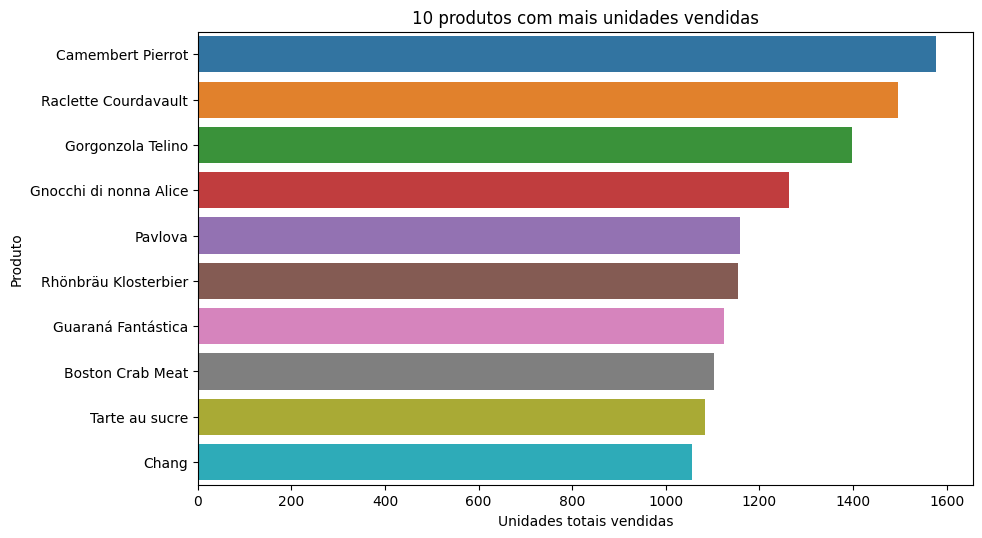

In [118]:
# Gráfico de barras
unidades_vendidas_por_produto = sns.barplot(x= query_produtos_unidades_vendidas['quantitySalesProduct'], 
                                            y= query_produtos_unidades_vendidas['ProductName'])
#Título
unidades_vendidas_por_produto.set_title('10 produtos com mais unidades vendidas')

#Legenda eixo x
unidades_vendidas_por_produto.set_xlabel('Unidades totais vendidas')

#Legenda eixo y
unidades_vendidas_por_produto.set_ylabel('Produto')

# Por países

####Valor total vendido

In [146]:
query = """SELECT s.Country,
          SUM(o.UnitPrice * o.Quantity) AS 'TotalSale'
    
    FROM 
    Supplier AS s, product AS p, orderItem AS o
    
    WHERE
    s.Id = p.SupplierId AND
    p.Id = o.ProductId
    
    GROUP BY 
    s.Country
    
    ORDER BY
    TotalSale DESC;"""

query_vendas_por_pais = pd.read_sql_query(query, conn)

query_vendas_por_pais.head()

,Country,TotalSale
0,France,296381.75
1,Germany,211540.09
2,Australia,185022.65
3,USA,128844.15
4,Italy,104011.50


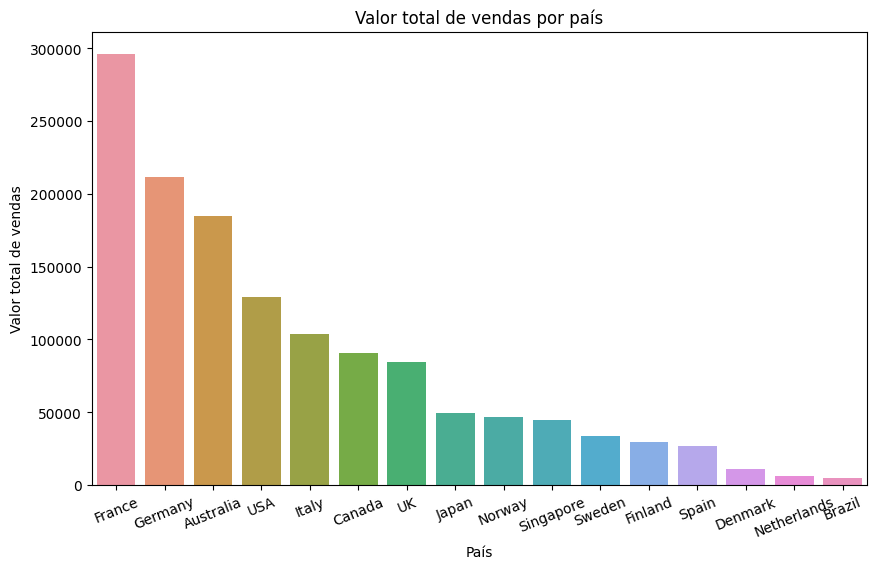

In [154]:
# Gráfico de barras
vendas_totais_por_paises = sns.barplot(y= query_vendas_por_pais['TotalSale'], x= query_vendas_por_pais['Country'])

#Título
vendas_totais_por_paises.set_title('Valor total de vendas por país')

#Legenda eixo x
vendas_totais_por_paises.set_xlabel('País')

#Legenda eixo y
vendas_totais_por_paises.set_ylabel('Valor total de vendas')

# Rotacionando nome dos países no eixo x
vendas_totais_por_paises.set_xticklabels(labels= query_vendas_por_pais['Country'], rotation= 22);

####Unidades totais vendidas

In [159]:
query = """SELECT s.Country,
          SUM(o.Quantity) AS 'quantitySalesProduct'
    
    FROM 
    Supplier AS s, product AS p, orderItem AS o
    
    WHERE
    s.Id = p.SupplierId AND
    p.Id = o.ProductId
    
    GROUP BY 
    s.Country
    
    ORDER BY
    quantitySalesProduct DESC;"""

query_unidades_vendidas_por_pais = pd.read_sql_query(query, conn)

query_unidades_vendidas_por_pais.head()

,Country,quantitySalesProduct
0,USA,6828
1,Germany,6120
2,Australia,6045
3,UK,5064
4,France,5023


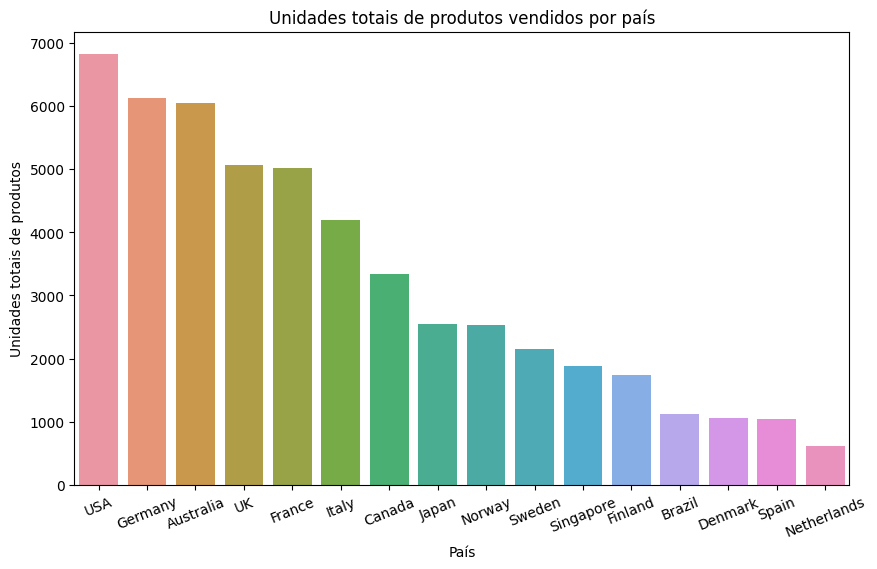

In [163]:
# Gráfico de barras
unidade_produtos_por_pais = sns.barplot(x= query_unidades_vendidas_por_pais['Country'], 
                                        y= query_unidades_vendidas_por_pais['quantitySalesProduct'])

#Título
unidade_produtos_por_pais.set_title('Unidades totais de produtos vendidos por país')

#Legenda eixo x
unidade_produtos_por_pais.set_xlabel('País')

#Legenda eixo y
unidade_produtos_por_pais.set_ylabel('Unidades totais de produtos')

# Rotacionando nome dos países no eixo x
unidade_produtos_por_pais.set_xticklabels(labels= query_unidades_vendidas_por_pais['Country'], rotation= 22);

#Hipóteses

Apesar das empresas que possuem mais arrecadações serem a maioria similares àquelas que mais vendem unidades de produtos, a ordem dos gráficos que mostram as duas informações não é a mesma.
Assim, não é porque uma empresa vende mais unidades que ela terá maior arrecadação e vice-versa.

A mesma lógica acontece quando comparamos os valores e as unidades totais de vendas por cada país de origem dos fornecedores. Assim, o Brasil de país com menor arrecadamento (entre os 16 presentes nos dados) sobe à 13ª posição de países com mais unidades de produtos vendidas. Os EUA, por sua vez, de 4º maior país com valor total é o país com maior número de unidades vendidas.

Obs: Importante ressaltar que não temos informações dos gastos com produtos dessas empresas, portanto não conseguimos saber os seus lucros, mas somente o valor total vendido. Uma empresa pode ter, por exemplo, arrecadado um alto valor, porém também gastou um alto valor na compra/produção de produtos caros.